## Logistic Regression as a Neural Network

Inspired by: Neural Networks and Deep Learning Course on Coursera

Link: https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning


Applied on: Car vs Non-Cat Classification Dataset

Link: https://www.kaggle.com/datasets/mriganksingh/cat-images-dataset




In [26]:
import os
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
train_file = h5py.File('/content/train_catvnoncat.h5', 'r')
test_file = h5py.File('/content/test_catvnoncat.h5', 'r')

In [28]:
for key in train_file.keys():
    print(key, end = ', ')

list_classes, train_set_x, train_set_y, 

In [39]:
X_train = np.array(train_file['train_set_x'][:])
y_train = np.array(train_file['train_set_y'][:])

X_test = np.array(test_file['test_set_x'][:])
y_test = np.array(test_file['test_set_y'][:])

classes = np.array(test_file["list_classes"][:])

In [40]:
print(X_train.shape)
print(X_test.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)


In [41]:
print(y_train.shape)
print(y_test.shape)

(209,)
(50,)


In [42]:
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1,y_test.shape[0]))
print(y_train.shape)
print(y_test.shape)

(1, 209)
(1, 50)


'[0]'

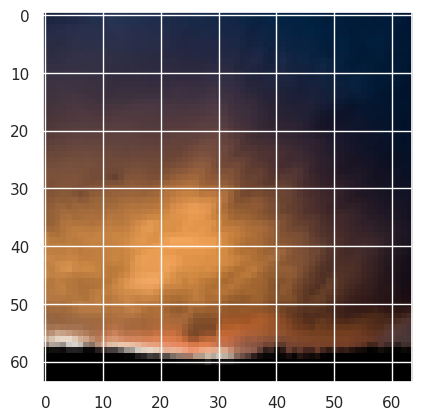

In [34]:
index = 0
plt.imshow(X_train[index])
str(y_train[:, index])

In [48]:
## Processing #1 : Reshaping X
X_train_p1 = X_train.reshape(X_train.shape[0],-1).T
X_test_p1 = X_test.reshape(X_test.shape[0],-1).T

print(X_train_p1.shape)
print(X_test_p1.shape)

(12288, 209)
(12288, 50)


### Architecture

𝐺𝑖𝑣𝑒𝑛 𝑥 , 𝑦̂ = 𝑃(𝑦 = 1|𝑥), where 0 ≤ 𝑦̂ ≤ 1


Parameters of logistic regression
1.   Input observation,features matrix X
2.   Target vector Y
3.   Weights w
4.   Threshold or bias b
5.   Output: 𝑦̂, sigmoid(z) where z = 𝑤 𝑇 *𝑥 + 𝑏

To get the parameters w and b (i.e. learning), we optimize on:

𝐽(𝑤, 𝑏) = 1/m (∑ 𝐿(𝑦̂ (𝑖) , 𝑦 (𝑖) ))

i.e.

𝐽(𝑤, 𝑏) = 1/m (∑ ylog((𝑦̂) + (1-y)(1-log(1-𝑦̂)))



In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Forward Pass
def get_cost(X,w,b,Y):
  m = X.shape[1]
  Z = np.dot(w.T, X) + b
  A = sigmoid(Z)

  return np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m

def get_gradients(X,w,b,Y):
  m = X.shape[1]
  Z = np.dot(w.T, X) + b
  A = sigmoid(Z)

  dw = (np.dot(X, (A-Y).T))/m
  db = (np.sum(A - Y)) / m
  return dw, db

def optimizer(X,w,b,Y,learningrate, iterations):
  costs=[]

  for i in range(iterations):
    dw, db = get_gradients(X,w,b,Y)
    w = w - (learningrate*dw)
    b = b - (learningrate*db)

    cost = get_cost(X,w,b,Y)
    costs.append(cost)

  return dw, db, w, b, costs

def get_predictions(X,w,b,baseline=0.5):
  m = X.shape[1]
  y_pred = np.zeros((1, m))
  A = sigmoid(np.dot(w.T,X) + b)

  for i in range(A.shape[1]):
      if A[0, i] >= baseline:
          y_pred[0, i] = 1
      else:
          y_pred[0, i] = 0

  return y_pred


In [81]:
size_w = X_train_p1.shape[0]
w = np.zeros((size_w, 1))
b = 0

## Experiment: try different learningrates
dw, db, w, b, costs = optimizer(X_train_p1, w, b, y_train, learningrate=0.00001, iterations= 50)
dw, db, w, b, costs

(array([[60.2494515 ],
        [64.95710659],
        [55.99812824],
        ...,
        [54.40062773],
        [57.1525577 ],
        [41.99824424]]),
 0.6125387801364602,
 array([[ 0.00041726],
        [-0.001241  ],
        [-0.00047469],
        ...,
        [-0.00076874],
        [-0.00181981],
        [ 0.00055124]]),
 -8.036117588264423e-06,
 [68.31070649470877,
  nan,
  nan,
  39.78401699233342,
  nan,
  nan,
  11.314854086879214,
  nan,
  nan,
  nan,
  nan,
  57.36232689024544,
  nan,
  nan,
  28.866390826021867,
  nan,
  nan,
  nan,
  nan,
  nan,
  80.7297119098587,
  nan,
  nan,
  50.950718817561516,
  nan,
  nan,
  23.182461526011934,
  nan,
  nan,
  nan,
  nan,
  nan,
  32.25453035444755,
  nan,
  nan,
  nan,
  nan,
  nan,
  43.33684753724574,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan])

In [82]:
size_w = X_train_p1.shape[0]
w = np.zeros((size_w, 1))
b = 0

## Experiment: try different learningrates
dw, db, w, b, costs = optimizer(X_train_p1, w, b, y_train, learningrate=0.001, iterations= 50)
dw, db, w, b, costs

(array([[58.34449761],
        [62.46411483],
        [54.46411483],
        ...,
        [53.61722488],
        [55.45454545],
        [41.35406699]]),
 0.5789473684210527,
 array([[ 0.04118182],
        [-0.12459569],
        [-0.04752153],
        ...,
        [-0.07614593],
        [-0.18098086],
        [ 0.05657656]]),
 -0.0008157894194391488,
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan])

In [75]:
def train(X_train, X_test, y_train, y_test, learningrate, iterations):

  ## Init parameters
  size_w = X_train.shape[0]
  w = np.zeros((size_w, 1))
  b = 0

  ## Optimize
  dw, db, w, b, costs = optimizer(X_train, w, b, y_train, learningrate, iterations)

  ## Predict
  y_pred_train = get_predictions(X_train,w,b,baseline=0.5)
  y_pred_test = get_predictions(X_test,w,b,baseline=0.5)

  train_accuracy = 100 - round(np.mean(np.abs(y_pred_train - y_train)) * 100, 3)
  test_accuracy = 100 - round(np.mean(np.abs(y_pred_test - y_test)) * 100, 3)

  print(f"Training accuracy: {train_accuracy} %")
  print(f"Test accuracy: {test_accuracy} %")

  predictions = {
        "training_predictions" : y_pred_train,
        "test_predictions" : y_pred_test,
    }

  return predictions, costs

In [85]:
predictions, costs = train(X_train_p1, X_test_p1, y_train, y_test, learningrate=0.0000001, iterations= 50)

Training accuracy: 48.804 %
Test accuracy: 74.0 %


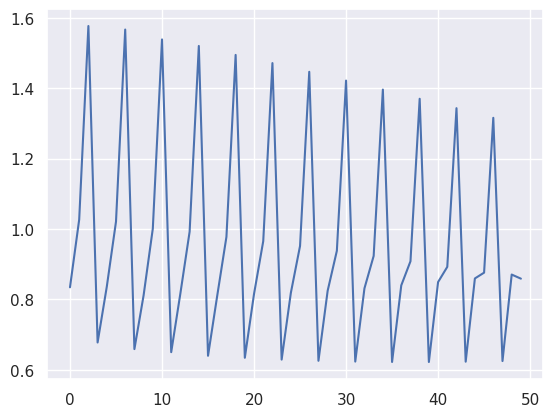

In [86]:
iterations= 50
plt.plot(range(0, iterations), costs)